### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)

In [93]:
tf.__version__

'1.12.0'

### Collect Data

In [0]:
import keras

In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [98]:
print(trainX.shape, trainY.shape)
print (testX.shape, testY.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

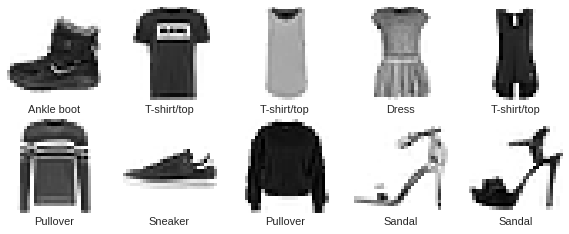

In [102]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[trainY[i]])

In [103]:
print(trainX.shape, trainY.shape)
print (testX.shape, testY.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))

In [0]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))

In [0]:
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(60, activation='relu'))

In [0]:
#Add 4th hidden layer
model.add(tf.keras.layers.Dense(30, activation='relu'))

In [0]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model using model.fit()

In [112]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=10,
          batch_size=100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.5950 - acc: 0.7897 - val_loss: 0.4613 - val_acc: 0.8342
Epoch 2/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.3939 - acc: 0.8571 - val_loss: 0.3970 - val_acc: 0.8550
Epoch 3/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.3511 - acc: 0.8721 - val_loss: 0.3871 - val_acc: 0.8600
Epoch 4/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.3240 - acc: 0.8812 - val_loss: 0.3835 - val_acc: 0.8631
Epoch 5/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.3045 - acc: 0.8877 - val_loss: 0.3570 - val_acc: 0.8702
Epoch 6/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.2903 - acc: 0.8925 - val_loss: 0.3595 - val_acc: 0.8723
Epoch 7/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.2736 - acc: 0.8980 - val_loss: 0.3554 - val_acc

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [114]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=30,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 9s 142us/step - loss: 0.6040 - acc: 0.7922 - val_loss: 0.5211 - val_acc: 0.8219
Epoch 2/30
60000/60000 [==============================] - 8s 135us/step - loss: 0.4916 - acc: 0.8302 - val_loss: 0.5005 - val_acc: 0.8288
Epoch 3/30
60000/60000 [==============================] - 8s 135us/step - loss: 0.4696 - acc: 0.8383 - val_loss: 0.4759 - val_acc: 0.8344
Epoch 4/30
60000/60000 [==============================] - 8s 135us/step - loss: 0.4582 - acc: 0.8418 - val_loss: 0.4794 - val_acc: 0.8348
Epoch 5/30
60000/60000 [==============================] - 8s 135us/step - loss: 0.4517 - acc: 0.8448 - val_loss: 0.4739 - val_acc: 0.8346
Epoch 6/30
60000/60000 [==============================] - 9s 145us/step - loss: 0.4425 - acc: 0.8460 - val_loss: 0.4623 - val_acc: 0.8368
Epoch 7/30
60000/60000 [==============================] - 8s 136us/step - loss: 0.4405 - acc: 0.8483 - val_loss: 0.4720 - 

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
#Create optimizer with non-default learning rate
sgd_optimizer2 = tf.keras.optimizers.SGD(lr=0.001)

In [0]:
#Compile the model
model.compile(optimizer=sgd_optimizer2, loss='categorical_crossentropy', metrics=['accuracy'])

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and sigmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))


In [0]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))


In [0]:
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))

In [0]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(3, activation='softmax'))

In [0]:
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

## Review model

In [122]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_5 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 784)               3136      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_21 (Dense)             (None, 100)               1100      
_________________________________________________________________
dense_22 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_23 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_24 (Dense)             (None, 3)                 33        
Total para

In [0]:
model.save('mnist_dnn_v01.h5')

### Run the model

In [131]:
!ls

mnist_dnn_v01.h5  sample_data


In [0]:
model= tf.keras.models.load_model('mnist_dnn_v01.h5')